In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns
import matplotlib as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error


%matplotlib inline

In [97]:
calories = pd.read_csv('calories.csv')
excercise = pd.read_csv('exercise.csv')


### Combining two datasets

In [43]:
data= pd.concat([excercise, calories['Calories']], axis =1)

In [44]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [45]:
data = data.drop(columns ='User_ID', axis =1)

In [46]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [47]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [50]:
data['Gender'].replace(0, 'Female', inplace = True)
data['Gender'].replace(1, 'Male')

0          male
1        female
2          male
3        female
4        female
          ...  
14995    female
14996    female
14997    female
14998      male
14999      male
Name: Gender, Length: 15000, dtype: object

In [51]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [57]:
 data.replace({'Gender':{'male':0, 'female':1}}, inplace=True)

In [58]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [89]:

# import seaborn as sns

# import matplotlib.pyplot as plt

# # taking all rows but only 6 columns
# df_small = df.iloc[:,:6]

# correlation_mat = df_small.corr()

# sns.heatmap(correlation_mat, annot = True)

# plt.show()

In [115]:
import matplotlib as plt
correlation_matrix = data.corr().round(2)
# # annot = True to print the values inside the square
# #plt.figure(figsize=(20, 20))
# sns.heatmap(data=correlation_matrix, annot=True, cmap ='coolwarm')


<AxesSubplot:>

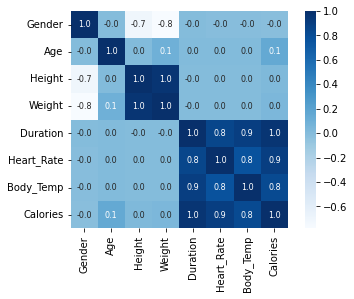

In [118]:
#plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [104]:
data.describe()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


/usr/share/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

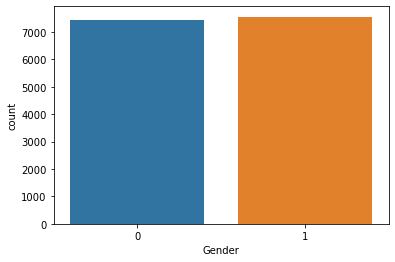

In [106]:
sns.countplot(data['Gender'])

/usr/share/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

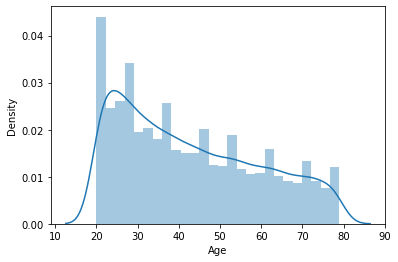

In [107]:
# finding the distribution of "Age" column
sns.distplot(data['Age'])

/usr/share/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

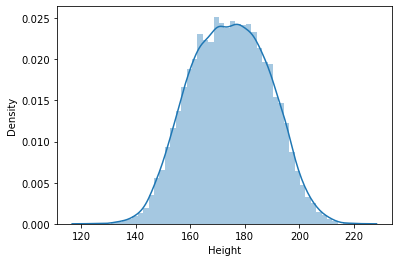

In [112]:
# finding the distribution of "Height" column
sns.distplot(data['Height'])

In [121]:
normalized_data = preprocessing.normalize(data)

In [124]:
scaled_df = pd.DataFrame(normalized_data, columns=['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Calories'])

In [126]:
scaled_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0.000000,0.199267,0.556776,0.275458,0.084982,0.307692,0.119560,0.676923
1,0.004634,0.092679,0.769235,0.278037,0.064875,0.435591,0.186748,0.305841
2,0.000000,0.299757,0.777631,0.343200,0.021722,0.382299,0.168125,0.112952
3,0.004261,0.144859,0.762640,0.302500,0.055387,0.426056,0.172553,0.302500
4,0.005179,0.139838,0.797595,0.300393,0.051792,0.419514,0.206132,0.181272


/usr/share/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

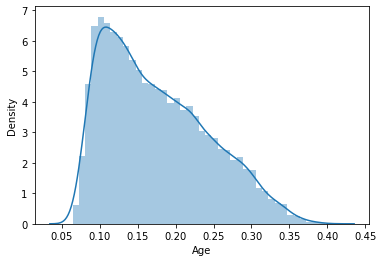

In [127]:
# finding the distribution of "Age" column
sns.distplot(scaled_df['Age'])

In [128]:
X = scaled_df.drop(columns=['Calories'], axis=1)
Y = scaled_df['Calories']

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [130]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


### Model Training

In [131]:
# loading the model
model = XGBRegressor()

##### Regression predictive modeling problems involve predicting a numerical value such as a dollar amount or a height. XGBoost can be used directly for regression predictive modeling.   
##### Decision trees create a model that predicts the label by evaluating a tree of if-then-else true/false feature questions, and estimating the minimum number of questions needed to assess the probability of making a correct decision. Decision trees can be used for classification to predict a category, or regression to predict a continuous numeric value. In the simple example below, a decision tree is used to estimate a house price (the label) based on the size and number of bedrooms (the features).

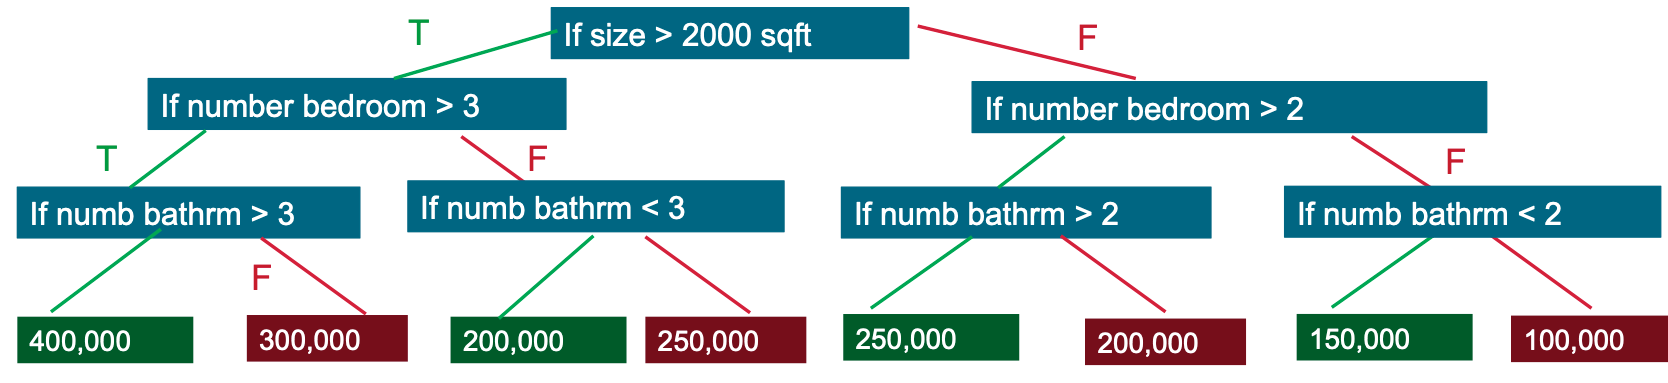

##### Both random forest and GBDT build a model consisting of multiple decision trees. The difference is in how the trees are built and combined.

##### Both random forest and GBDT build a model consisting of multiple decision trees.

##### Random forest uses a technique called bagging to build full decision trees in parallel from random bootstrap samples of the data set. The final prediction is an average of all of the decision tree predictions.
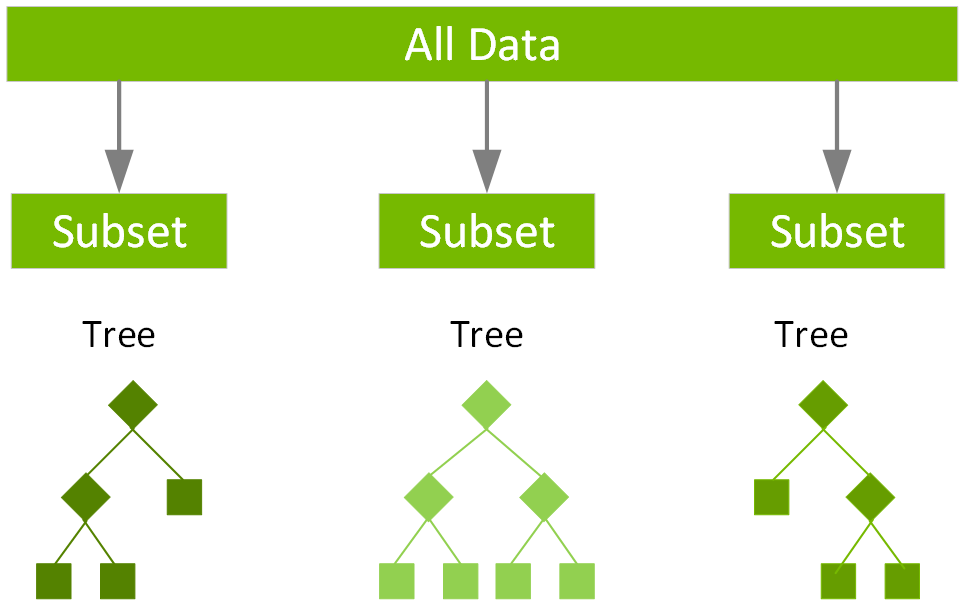
##### The term “gradient boosting” comes from the idea of “boosting” or improving a single weak model by combining it with a number of other weak models in order to generate a collectively strong model. Gradient boosting is an extension of boosting where the process of additively generating weak models is formalized as a gradient descent algorithm over an objective function. Gradient boosting sets targeted outcomes for the next model in an effort to minimize errors. Targeted outcomes for each case are based on the gradient of the error (hence the name gradient boosting) with respect to the prediction.

##### GBDTs iteratively train an ensemble of shallow decision trees, with each iteration using the error residuals of the previous model to fit the next model. The final prediction is a weighted sum of all of the tree predictions. Random forest “bagging” minimizes the variance and overfitting, while GBDT “boosting” minimizes the bias and underfitting.

##### XGBoost is a scalable and highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms, being built largely for energizing machine learning model performance and computational speed. With XGBoost, trees are built in parallel, instead of sequentially like GBDT. It follows a level-wise strategy, scanning across gradient values and using these partial sums to evaluate the quality of splits at every possible split in the training set. 



In [132]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Prediction on test data

In [133]:
y_test_pred = model.predict(X_test)

In [134]:
print(y_test_pred)

[0.49623638 0.66059244 0.17654271 ... 0.5541778  0.11140227 0.38644734]


In [135]:
print(Y_test)

7592     0.499228
3551     0.660451
9698     0.170597
3759     0.025530
2353     0.523678
           ...   
8859     0.645602
2886     0.248821
14357    0.562400
9430     0.111921
11870    0.373001
Name: Calories, Length: 3000, dtype: float64


### Defining MAPE

In [142]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [143]:
mae = metrics.mean_absolute_error(Y_test, y_test_pred)
print("Mean Absolute Error is ",mae)
print("R-Square for Random Forest Regression : ", r2_score(Y_test, y_test_pred))
print("MAPE for Random Forest Regression : ", mean_absolute_percentage_error(Y_test, y_test_pred))

Mean Absolute Error is  0.0042936214453837334
R-Square for Random Forest Regression :  0.999199419392765
MAPE for Random Forest Regression :  2.586495993462795
